In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
X_train = X_train / 255.0
X_test = X_test / 255.0

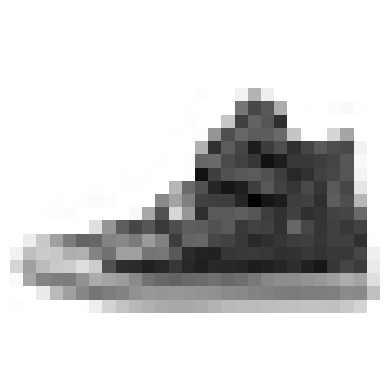

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[142], cmap="binary")
plt.axis('off')
plt.show()

In [4]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[142]]

'but'

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(300))
model.add(layers.Dense(100))
model.add(layers.Dense(10, activation="softmax"))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


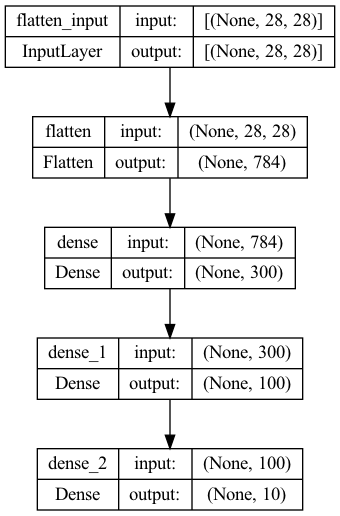

In [6]:
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [7]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [8]:
from datetime import datetime
def tensorboard_callback(name):
    dir_name = name + '/' + datetime.now().strftime("%H%M%S")
    return tf.keras.callbacks.TensorBoard(log_dir=dir_name, profile_batch=5)

In [9]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[tensorboard_callback('./image_logs')])

Epoch 1/20


2023-05-24 18:03:41.315148: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:03:41.315158: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:03:41.315427: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:03:41.390890: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 240/1688 [===>..........................] - ETA: 1s - loss: 0.9952 - accuracy: 0.6518

2023-05-24 18:03:41.551138: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:03:41.551149: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:03:41.552644: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-24 18:03:41.553027: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:03:41.553901: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: ./image_logs/180341/plugins/profile/2023_05_24_18_03_41/MacBook-Pro-Eryk.local.xplane.pb


1688/1688 [==============================] - 2s 961us/step - loss: 0.6282 - accuracy: 0.7849 - val_loss: 0.4934 - val_accuracy: 0.8205
Epoch 2/20
1688/1688 [==============================] - 2s 935us/step - loss: 0.4819 - accuracy: 0.8328 - val_loss: 0.4546 - val_accuracy: 0.8363
Epoch 3/20
1688/1688 [==============================] - 2s 927us/step - loss: 0.4550 - accuracy: 0.8420 - val_loss: 0.4517 - val_accuracy: 0.8392
Epoch 4/20
1688/1688 [==============================] - 2s 940us/step - loss: 0.4405 - accuracy: 0.8471 - val_loss: 0.4340 - val_accuracy: 0.8413
Epoch 5/20
1688/1688 [==============================] - 2s 969us/step - loss: 0.4311 - accuracy: 0.8516 - val_loss: 0.4257 - val_accuracy: 0.8522
Epoch 6/20
1688/1688 [==============================] - 2s 919us/step - loss: 0.4240 - accuracy: 0.8533 - val_loss: 0.4658 - val_accuracy: 0.8328
Epoch 7/20
1688/1688 [==============================] - 2s 916us/step - loss: 0.4196 - accuracy: 0.8539 - val_loss: 0.4349 - val_accura

1/1 [==============================] - 0s 39ms/step
Prediction: sandał
Confidence: 0.9962238
Truth: sandał


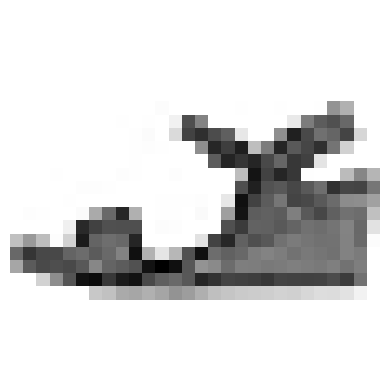

In [10]:
import numpy as np
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
model.save("fashion_clf.h5")

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# import pandas as pd
# housing_X = pd.DataFrame(X_train, columns=housing.feature_names)
# housing_X.isnull().any()

In [15]:
def reg_tensorboard_callback(name):
    dir_name = './housing_logs/' + name
    return tf.keras.callbacks.TensorBoard(log_dir=dir_name, profile_batch=5)

In [16]:
model_reg = keras.models.Sequential([
    layers.Dense(30),
    layers.Dense(1)
])
model_reg.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(clipvalue=1.0))

In [17]:
def early_stopping():
    return tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [18]:
model_reg.fit(X_train, y_train, epochs=100, 
    validation_data=(X_valid, y_valid), callbacks=[early_stopping(), reg_tensorboard_callback('30')])

Epoch 1/100
  1/413 [..............................] - ETA: 50s - loss: 4.6555

2023-05-24 18:04:14.606525: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:14.606534: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:14.606798: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:14.761390: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:14.761401: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:14.786733: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-24 18:04:14.787112: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:14.787443: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: ./housing_logs/30/plugins/profile/2023_05_24_18_04_14/MacBook-Pro-Eryk.local.xplane.pb


413/413 [==============================] - 0s 568us/step - loss: 0.8361 - val_loss: 3.3087
Epoch 2/100
413/413 [==============================] - 0s 465us/step - loss: 0.7374 - val_loss: 5.3516
Epoch 3/100
413/413 [==============================] - 0s 394us/step - loss: 1.0464 - val_loss: 6.2420
Epoch 4/100
413/413 [==============================] - 0s 391us/step - loss: 1.1187 - val_loss: 5.3978
Epoch 5/100
413/413 [==============================] - 0s 389us/step - loss: 1.0501 - val_loss: 5.4840
Epoch 6/100
413/413 [==============================] - 0s 392us/step - loss: 1.1369 - val_loss: 5.4250
Epoch 6: early stopping


In [19]:
model_reg.save("reg_housing_1.h5")

In [20]:
model_reg_2 = keras.models.Sequential([
    layers.Dense(15, activation="relu"),
    layers.Dense(15, activation="relu"),
    layers.Dense(1)
])
model_reg_2.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(clipvalue=1.0))
model_reg_2.fit(X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid), callbacks=[early_stopping(), reg_tensorboard_callback('15_15')])
model_reg_2.save("reg_housing_2.h5")

Epoch 1/100


2023-05-24 18:04:15.883426: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:15.883438: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:15.883492: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


370/413 [=========================>....] - ETA: 0s - loss: 0.7709

2023-05-24 18:04:16.143004: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:16.143013: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:16.160299: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-24 18:04:16.160677: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:16.161069: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: ./housing_logs/15_15/plugins/profile/2023_05_24_18_04_16/MacBook-Pro-Eryk.local.xplane.pb


413/413 [==============================] - 0s 611us/step - loss: 0.7420 - val_loss: 0.8116
Epoch 2/100
413/413 [==============================] - 0s 494us/step - loss: 0.4514 - val_loss: 0.4972
Epoch 3/100
413/413 [==============================] - 0s 414us/step - loss: 0.4225 - val_loss: 0.4604
Epoch 4/100
413/413 [==============================] - 0s 420us/step - loss: 0.4094 - val_loss: 0.4351
Epoch 5/100
413/413 [==============================] - 0s 409us/step - loss: 0.3978 - val_loss: 0.4395
Epoch 6/100
413/413 [==============================] - 0s 449us/step - loss: 0.3923 - val_loss: 0.4149
Epoch 7/100
413/413 [==============================] - 0s 429us/step - loss: 0.3861 - val_loss: 0.4243
Epoch 8/100
413/413 [==============================] - 0s 439us/step - loss: 0.3808 - val_loss: 0.4085
Epoch 9/100
413/413 [==============================] - 0s 444us/step - loss: 0.3751 - val_loss: 0.4108
Epoch 10/100
413/413 [==============================] - 0s 421us/step - loss: 0.3710 

In [21]:
model_reg_3 = keras.models.Sequential([
    layers.Dense(30),
    layers.Dense(30),
    layers.Dense(1)
])
model_reg_3.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(clipvalue=1.0))
model_reg_3.fit(X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid), callbacks=[early_stopping(), reg_tensorboard_callback('30_30')])
model_reg_3.save("reg_housing_3.h5")

Epoch 1/100
  1/413 [..............................] - ETA: 1:06 - loss: 5.5282

2023-05-24 18:04:20.154715: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:20.154728: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:20.154786: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:20.350466: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:20.350475: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


374/413 [==========================>...] - ETA: 0s - loss: 0.6792

2023-05-24 18:04:20.366168: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-24 18:04:20.366597: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:20.366961: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: ./housing_logs/30_30/plugins/profile/2023_05_24_18_04_20/MacBook-Pro-Eryk.local.xplane.pb


413/413 [==============================] - 0s 595us/step - loss: 0.6607 - val_loss: 5.0512
Epoch 2/100
413/413 [==============================] - 0s 418us/step - loss: 1.0733 - val_loss: 1.5817
Epoch 3/100
413/413 [==============================] - 0s 416us/step - loss: 0.6776 - val_loss: 1.7654
Epoch 4/100
413/413 [==============================] - 0s 408us/step - loss: 0.8803 - val_loss: 1.7335
Epoch 5/100
413/413 [==============================] - 0s 410us/step - loss: 0.9940 - val_loss: 0.7223
Epoch 6/100
413/413 [==============================] - 0s 411us/step - loss: 1.0670 - val_loss: 0.7209
Epoch 7/100
413/413 [==============================] - 0s 411us/step - loss: 1.1512 - val_loss: 0.9496
Epoch 8/100
413/413 [==============================] - 0s 412us/step - loss: 0.9542 - val_loss: 1.0098
Epoch 9/100
413/413 [==============================] - 0s 411us/step - loss: 0.9229 - val_loss: 1.3905
Epoch 10/100
413/413 [==============================] - 0s 427us/step - loss: 0.5752 

In [22]:
model_reg_4 = keras.models.Sequential([
    layers.Dense(15),
    layers.Dense(1)
])
model_reg_4.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(clipvalue=1.0))
model_reg_4.fit(X_train, y_train, epochs=100, 
    validation_data=(X_valid, y_valid), callbacks=[early_stopping(), reg_tensorboard_callback('15')])

Epoch 1/100
103/413 [======>.......................] - ETA: 0s - loss: 1.4537 

2023-05-24 18:04:22.169789: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:22.169803: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:22.169822: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:22.314834: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-05-24 18:04:22.314844: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-05-24 18:04:22.327220: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2023-05-24 18:04:22.327539: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-05-24 18:04:22.327944: I tensorflow/core/profiler/rpc/client/save_profile.cc:164] Collecting XSpace to repository: ./housing_logs/15/plugins/profile/2023_05_24_18_04_22/MacBook-Pro-Eryk.local.xplane.pb


413/413 [==============================] - 0s 526us/step - loss: 0.8047 - val_loss: 3.7872
Epoch 2/100
413/413 [==============================] - 0s 385us/step - loss: 1.0542 - val_loss: 5.7309
Epoch 3/100
413/413 [==============================] - 0s 376us/step - loss: 1.0347 - val_loss: 7.2185
Epoch 4/100
413/413 [==============================] - 0s 379us/step - loss: 1.2267 - val_loss: 7.8465
Epoch 5/100
413/413 [==============================] - 0s 377us/step - loss: 1.1887 - val_loss: 8.1417
Epoch 6/100
413/413 [==============================] - 0s 374us/step - loss: 1.2136 - val_loss: 8.6259
Epoch 6: early stopping


In [23]:
model_reg.weights

[<tf.Variable 'dense_3/kernel:0' shape=(8, 30) dtype=float32, numpy=
 array([[-0.31197643,  0.22813849,  0.0329554 , -0.14846647, -0.21582805,
          0.17572838, -0.3559543 ,  0.09439091, -0.17353378, -0.02173463,
         -0.26533672,  0.25482386, -0.27695906,  0.34099954,  0.34426132,
          0.12208536, -0.1023815 , -0.17029   ,  0.15602791, -0.28600574,
         -0.17183498,  0.27583376, -0.17596902, -0.33571693, -0.3321217 ,
          0.08322275,  0.16975923, -0.4312987 ,  0.19809112,  0.16061819],
        [ 0.09970778,  0.07329285, -0.02440785,  0.117214  ,  0.43542838,
          0.13773352,  0.08862107, -0.10807125, -0.02263966, -0.21504703,
         -0.32889572,  0.11420684,  0.22366501,  0.1043968 ,  0.26442498,
         -0.13032258,  0.38716775, -0.21051821, -0.2947757 ,  0.3057513 ,
         -0.10644992,  0.05405886,  0.18615328,  0.12604108, -0.22409026,
          0.3745042 , -0.24643846, -0.10614043, -0.23561278, -0.3545346 ],
        [ 0.00656293, -0.01408691,  0.068